In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from sklearn import preprocessing
import re
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import matplotlib.cm as cm
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
true = pd.read_csv('Dataset_Fakenews/True.csv')
fake = pd.read_csv('Dataset_Fakenews/Fake.csv')

In [6]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [7]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [8]:
# combining true and fake news:

true['label']='fake'
fake['label']='true'

data = pd.concat([true, fake], axis=0)

In [9]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",true
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",true
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",true
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",true


In [10]:
#Selecting Two Columns:
data=data[['text','label']]
data

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,fake
1,WASHINGTON (Reuters) - Transgender people will...,fake
2,WASHINGTON (Reuters) - The special counsel inv...,fake
3,WASHINGTON (Reuters) - Trump campaign adviser ...,fake
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,fake
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,true
23477,21st Century Wire says It s a familiar theme. ...,true
23478,Patrick Henningsen 21st Century WireRemember ...,true
23479,21st Century Wire says Al Jazeera America will...,true


In [20]:
# checking for the content of some rows
pd.set_option('max_colwidth', None)
all_news = fake.append(true, ignore_index=True)
all_news.sample(3)

,title,text,subject,date,label
44872,Romanian president opposes plans for judicial overhaul,"BUCHAREST (Reuters) - Romania s justice minister proposed a significant overhaul of the judicial system on Wednesday which the president called an attack on the rule of law that would set the country back a decade. Romania is seen as one of the EU s most corrupt states and Brussels keeps its justice system under special monitoring. Attempts by the ruling coalition of Social Democrats and junior partner ALDE to weaken a crackdown on high-level corruption triggered the country s largest street protests in decades at the start of the year. Justice Minister Tudorel Toader proposed a slew of changes on Wednesday ranging from the way chief prosecutors are appointed to setting up a special prosecuting unit for crimes committed by magistrates. The proposals ... constitute an attack against the rule of law, the independence and proper functioning of the judiciary as well as the anti-corruption fight, centrist President Klaus Iohannis said in a statement. If this mix of measures is adopted by the government and approved by parliament, Romania s efforts for more than 10 years will be wiped out and the justice system will go back to a time when it was subordinated to politics. Under Romanian law, the president appoints chief prosecutors who have been proposed by the justice minister and received non-binding approval from the Superior Magistrates Council (CSM), the top watchdog that safeguards judicial independence. Toader also proposed that the justice minister, who is politically appointed, take control of the judicial inspection unit from the CSM. Analysts and magistrates have said this would lead to political interference in the justice system. The Prosecutor General s office said these proposals were an alarm signal, adding that prosecutors had not been consulted. Toader declined to answer questions but told reporters the proposals were within normal and necessary parameters for the rule of law. The proposals will be send to the CSM for an opinion before being submitted to the government and ultimately parliament for approval.",worldnews,"August 23, 2017",fake
25236,Two Democratic senators threaten to hold up Trump EPA nominee,"WASHINGTON (Reuters) - Two Democratic senators said on Wednesday they may hold up the confirmation of President Donald Trump’s Environmental Protection Agency nominee Susan Bodine until she explains her advisory role at the agency, which may violate federal law. Senators Sheldon Whitehouse of Rhode Island and Jeff Merkley of Oregon sent a list of questions to Bodine, Trump’s pick to head up the EPA’s Office of Enforcement and Compliance Assistance, about her current role as special counsel to EPA Administrator Scott Pruitt while she waits out the confirmation process. Whitehouse and Merkley said by advising Pruitt on enforcement matters before being confirmed by the Senate, Bodine may be violating the Federal Vacancies Reform Act that prohibits nominees from assuming the authorities of the office before being confirmed by Congress. “Your appointment creates the appearance, and perhaps the effect, of circumventing the Senate’s constitutional advice and consent responsibility for the position to which you have been nominated,” the Senators wrote. This means that subjects of EPA enforcement actions could potentially challenge the validity of these actions in court if her role in these decisions is deemed “improper,” they said. Pruitt is the only EPA appointee to have been confirmed since Trump took office in January. Bodine is still awaiting a full Senate vote after her Senate confirmation hearing in July, while four other assistant administrator nominees are set for confirmation hearings on Sept. 20. Democratic lawmakers have been at odds with Pruitt since his narrow-margin confirmation in February over his close ties to industry, his doubts about human-caused climate change, planned drastic cuts of the EPA’s budget and w

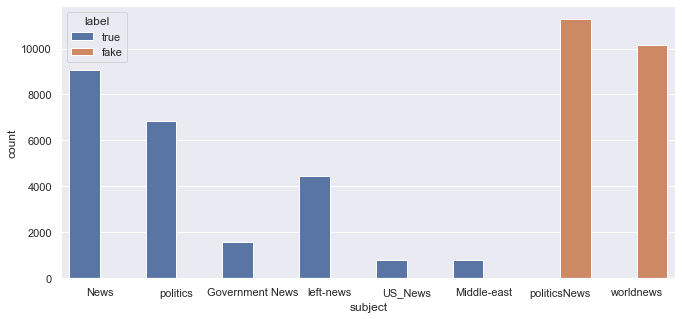

In [23]:
# checking for relationship between label and subject
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(x='subject', data=all_news, hue='label')

In [24]:
#converting date string to datetime format

#removing url in date column
url_pattern = "http"
filter1 = all_news['date'].str.contains(url_pattern)
all_news = all_news[~filter1]
all_news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017",true
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was know

In [25]:
# removing other texts in date column
date_pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = all_news['date'].str.contains(date_pattern)
all_news = all_news[filter2]
all_news.reset_index(drop=True, inplace=True)

In [26]:
# converting date string to datetime format
all_news_c = all_news.copy()
all_news_c['date'] = pd.to_datetime(all_news_c['date'])
all_news_c.sort_values(by=['date'], inplace=True)
all_news_c.reset_index(drop=True, inplace=True)
pd.reset_option('max_rows')
all_news_c

title  \
0                                                                                                    FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22 DRUG DEALERS   
1                                                                                   HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BAGGAGE THAN A SAMSONITE FACTORY   
2                                          BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER OATH AS WHITE HOUSE ASKS FOR MORE TIME TO “REVIEW” (DELETE) HER E-MAILS   
3                                                                                                              OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY   
4                                                                               WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY’S TAXES: “HE DIDN’T WIN, DID HE?”   
...                                                                                                                                                          ...   
44883  JUST IN: BADASS GENERAL JOHN KELLY Shoved Chinese Security Official’s Hand Off US Military Aide Carrying Nuclear Football During Trump Meeting In Beijing   
44884                                                                             GOTCHA! A Stammering John Podesta Stunned by a REAL Question from CBS Reporter   
44885                                                                     WATCH: SNOWFLAKES ASKED Communist Party Platform or Democratic Party Platform? [Video]   
44886                                                                     MSNBC ANCHOR Flabbergasted at What Texas Teachers Do to Protect Their Students [Video]   
44887                                                                      Democrat Senator Warns Mueller Not To Release Findings On Russia Before 2018 Midterms   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [33]:
data.shape

(44898, 2)

In [34]:
print('dataset count is: ', len(data))

dataset count is:  44898


In [35]:
#Analysis and Preprocessing
data['text']=data['text'].str.lower()
data['text'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bra

In [36]:
#columns:
data.columns

Index(['text', 'label'], dtype='object')

In [37]:
data['label'].unique()

array(['fake', 'true'], dtype=object)

In [38]:
#columns datatypes:
data.dtypes

text     object
label    object
dtype: object

In [17]:
#Verifying the null vales in the datasets:
data[data.isnull().any(axis=1)]

,text,label


In [39]:
#Null value count:
np.sum(data.isnull().any(axis=1))

0

In [40]:
#Dataset info:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


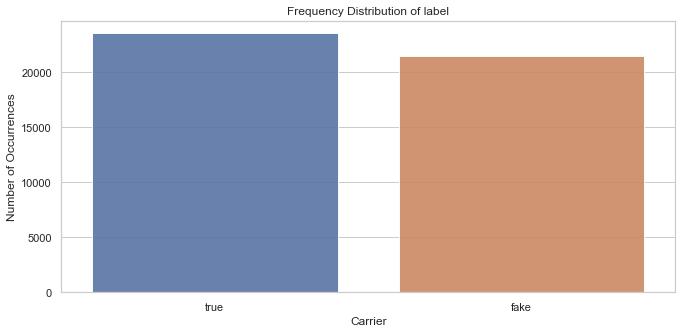

In [41]:
#Frequency distribution of label:
carrier_count = data["label"].value_counts()
sns.set(style="whitegrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of label')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

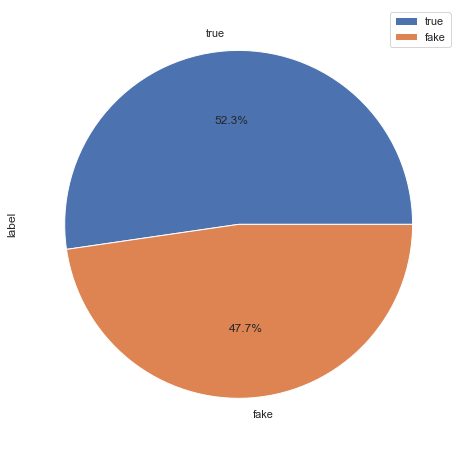

In [42]:
data["label"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [43]:
data["label"].value_counts()

true    23481
fake    21417
Name: label, dtype: int64

In [44]:
#words preprocessing

data.loc[data["text"].str.contains('america'), 'text'] = 'american'
data.loc[data["text"].str.contains('americans'), 'text'] = 'american'
data.loc[data["text"].str.contains('youore'), 'text'] = 'you are'
data.loc[data["text"].str.contains('youre'), 'text'] = 'you are'
data.loc[data["text"].str.contains('years'), 'text'] = 'year'
data.loc[data["text"].str.contains('break'), 'text'] = 'breakingnews'
data.loc[data["text"].str.contains('breaking'), 'text'] = 'breakingnews'
data.loc[data["text"].str.contains('caused'), 'text'] = 'cause'
data.loc[data["text"].str.contains('causes'), 'text'] = 'cause'
data.loc[data["text"].str.contains('county'), 'text'] = 'country'


In [45]:
for letter in '1234567890.(/':
    data["text"] = data["text"].str.replace(letter,'')

In [46]:
#Preprocessing on description:

english_punctuations = string.punctuation
punctuations_list = english_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [47]:
#Removing repeated characters:

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [48]:
#process post for applying all post:

def processPost(text): 

    text = re.sub('@[^\s]+', ' ', text)
    

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

    text = re.sub(r'#([^\s]+)', r'\1', text)

    text= remove_punctuations(text)
    text=remove_repeating_char(text)
    
    return text

In [49]:
#Applying processPost function for preprocessing:

data["text"] = data["text"].apply(lambda x: processPost(x))

In [50]:
#Tokenization:

tokenizer = RegexpTokenizer(r'\w+')
data["text"] = data["text"].apply(tokenizer.tokenize)

In [51]:
data["text"].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [year]
1                                                                                                                                                                                                                                     

In [52]:
#Stopwords:

stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
len(stopwords_list)

179

In [54]:
data["text"]=data["text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [55]:
data["text"].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [year]
1                                                                                                                                                   

In [56]:
#Text information:

all_words = [word for tokens in data["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))


3138438 words total, with a vocabulary size of 90312
Max sentence length is 1511


In [57]:
#Top words
counter = Counter(all_words)

In [58]:
counter.most_common(50)

[('said', 48117),
 ('trump', 38884),
 ('us', 19022),
 ('would', 16518),
 ('president', 16516),
 ('american', 16452),
 ('wil', 15049),
 ('reuters', 14006),
 ('ben', 13175),
 ('year', 11199),
 ('people', 10918),
 ('state', 10817),
 ('one', 10069),
 ('al', 9963),
 ('also', 9383),
 ('house', 9379),
 ('donald', 9334),
 ('new', 9159),
 ('government', 9116),
 ('told', 8619),
 ('clinton', 7738),
 ('could', 7220),
 ('states', 7157),
 ('campaign', 7046),
 ('republican', 7044),
 ('united', 6850),
 ('news', 6812),
 ('party', 6779),
 ('last', 6763),
 ('white', 6701),
 ('election', 6628),
 ('washington', 6607),
 ('two', 6178),
 ('like', 5826),
 ('obama', 5787),
 ('former', 5623),
 ('security', 5463),
 ('time', 5428),
 ('may', 5218),
 ('police', 5196),
 ('country', 5125),
 ('rusia', 5084),
 ('first', 5039),
 ('north', 5013),
 ('hilary', 4852),
 ('court', 4820),
 ('minister', 4695),
 ('statement', 4678),
 ('wek', 4659),
 ('say', 4613)]

In [59]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(50):
    words.append(letter)
    counts.append(count)

<BarContainer object of 50 artists>

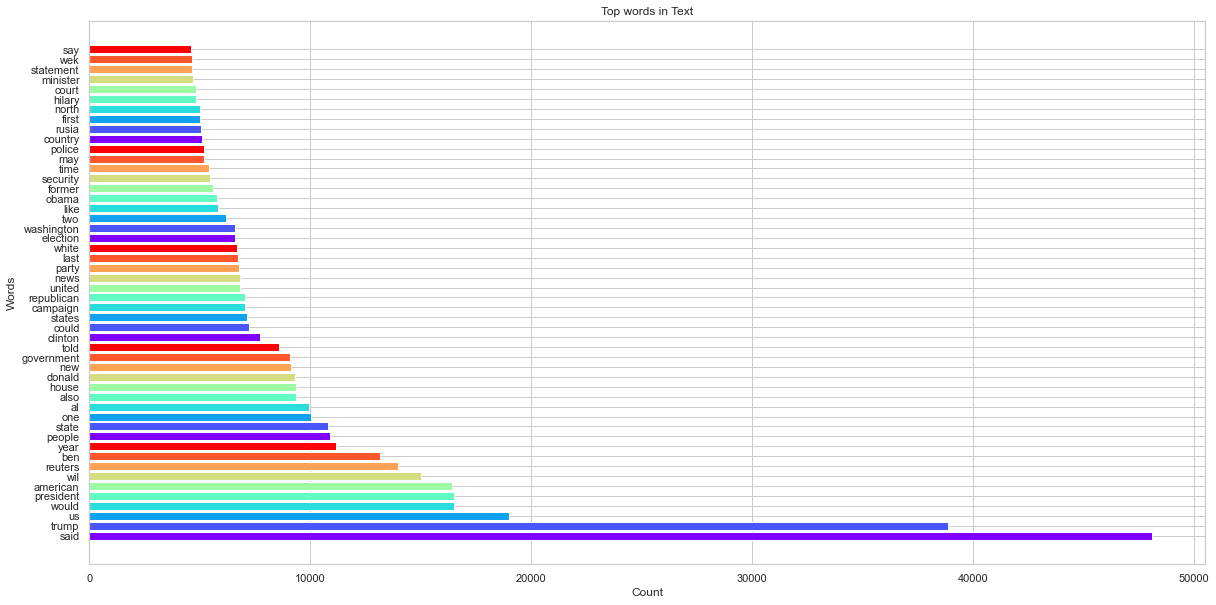

In [60]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in Text')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

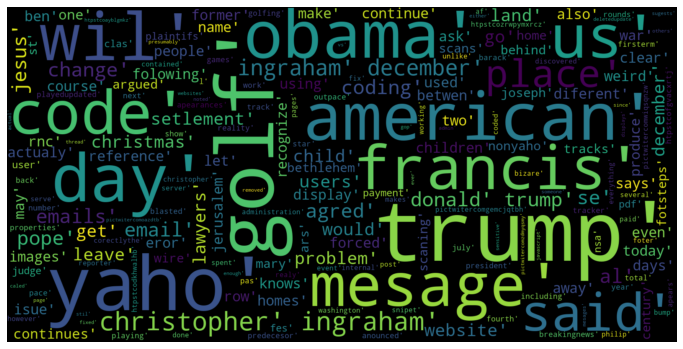

In [61]:
#True news word cloud:

data1=data[data['label']=='true']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

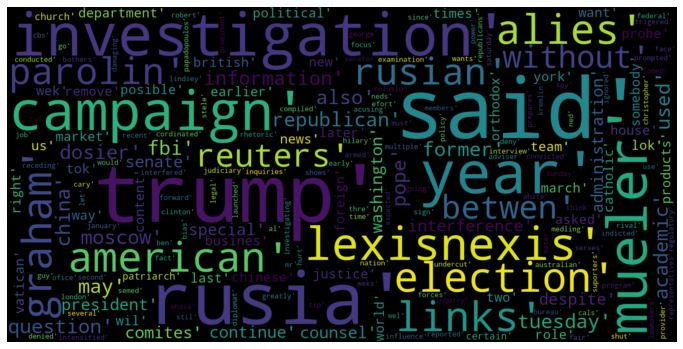

In [62]:
#Fake news word cloud:

data1=data[data['label']=='fake']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [63]:
#Features Extraction From the texts Text Unigram features

from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features =1000)

In [64]:
unigramdataGet= word_vectorizer.fit_transform(data['text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names()
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1
unigramdata.head()

,able,absolutely,acept,aces,acording,acount,acr,acros,act,action,...,wrong,wrote,xi,year,yearold,yemen,yes,york,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
vocab[0:100]

['able',
 'absolutely',
 'acept',
 'aces',
 'acording',
 'acount',
 'acr',
 'acros',
 'act',
 'action',
 'actions',
 'actualy',
 'acusations',
 'acused',
 'ad',
 'aded',
 'ading',
 'administration',
 'adres',
 'adviser',
 'afairs',
 'agencies',
 'agency',
 'agenda',
 'ago',
 'agre',
 'agred',
 'agrement',
 'ahead',
 'aid',
 'air',
 'al',
 'alegations',
 'aleged',
 'alies',
 'alow',
 'alowed',
 'aly',
 'ambasador',
 'american',
 'ankara',
 'anounced',
 'anouncement',
 'answer',
 'aparently',
 'apeared',
 'apears',
 'april',
 'aproved',
 'arab',
 'arabia',
 'area',
 'areas',
 'arest',
 'arested',
 'armed',
 'army',
 'article',
 'asault',
 'ask',
 'asked',
 'asking',
 'atack',
 'atacks',
 'atempt',
 'atorney',
 'august',
 'authorities',
 'authority',
 'avoid',
 'away',
 'backed',
 'bad',
 'balistic',
 'ban',
 'bangladesh',
 'bank',
 'barack',
 'base',
 'based',
 'began',
 'behavior',
 'beijing',
 'believe',
 'believed',
 'ben',
 'berlin',
 'bernie',
 'best',
 'beter',
 'betwen',
 'big',
 

In [66]:
print('Vocab Lenght ', len(vocab))

Vocab Lenght  1000


In [67]:
len(unigramdata)

44898

In [68]:
#Deleting the column:
data.reset_index(drop=True, inplace=True)
data=data.drop(columns=['text'])

In [69]:
#selection from the extracted features of unigram
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


selector = SelectKBest(chi2, k=700)
selector.fit(unigramdata, data['label'])

unigramdata = selector.transform(unigramdata)
print(unigramdata.shape)

(44898, 700)


In [70]:
#Training and Testing with unigram feature:

X=unigramdata
y=data['label']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape)
print(y_train.shape)

(31428, 700)
(31428,)


In [72]:
from sklearn.svm import LinearSVC

svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1, max_iter=500)

In [73]:
#Accuracy level:

y_pred1 = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.80


In [74]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.71      0.77      6414
        true       0.77      0.88      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.81      0.79      0.80     13470
weighted avg       0.81      0.80      0.80     13470







confusion matrix


[[4525 1889]
 [ 819 6237]]




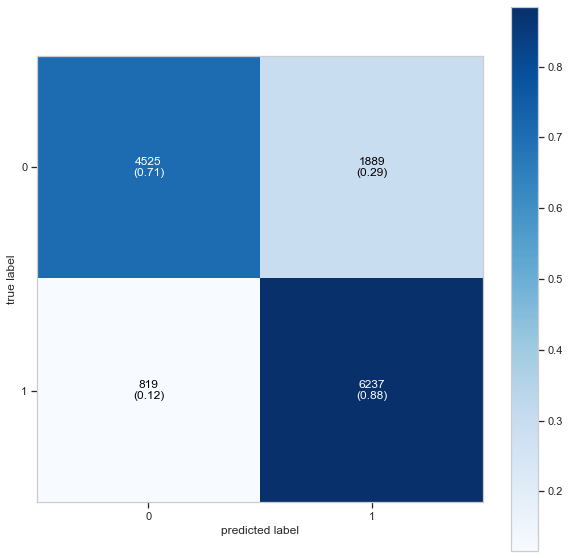

In [75]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [76]:
#Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(var_smoothing=1e-08)

In [77]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.73


In [78]:
#Precision:

from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.53      0.65      6414
        true       0.68      0.92      0.78      7056

    accuracy                           0.73     13470
   macro avg       0.77      0.72      0.72     13470
weighted avg       0.76      0.73      0.72     13470







confusion matrix


[[3376 3038]
 [ 578 6478]]




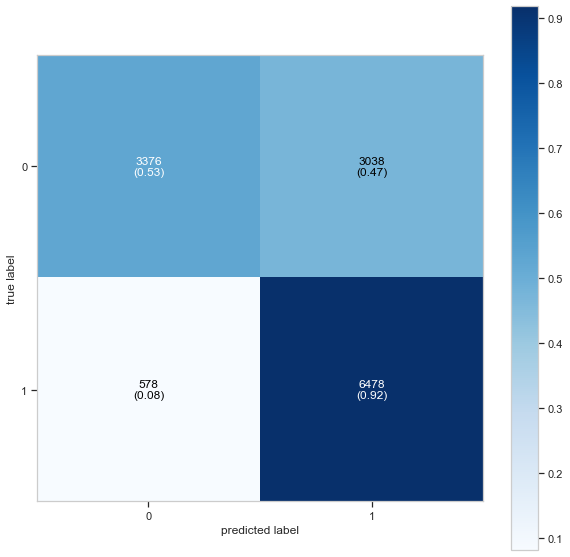

In [85]:
#Confusion matrix:

from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [86]:
#logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


lor=LogisticRegression(solver='liblinear', C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2, solver='liblinear')

In [87]:
#Accuracy:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.80


In [88]:
#Precision Recall:

from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.71      0.77      6414
        true       0.77      0.88      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.81      0.80      0.80     13470
weighted avg       0.81      0.80      0.80     13470







confusion matrix


[[4533 1881]
 [ 816 6240]]




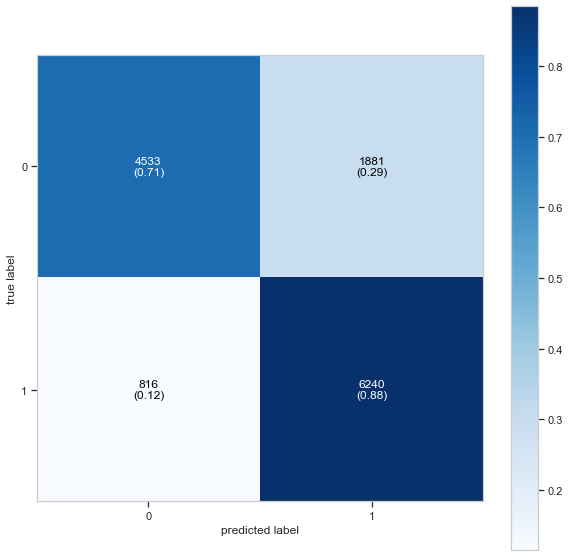

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [90]:
#Random Forest Algorithm:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       random_state=100)

In [91]:
#Accuracy:

y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.79


In [92]:
#Precision Recall:

from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.84      0.69      0.76      6414
        true       0.76      0.88      0.82      7056

    accuracy                           0.79     13470
   macro avg       0.80      0.79      0.79     13470
weighted avg       0.80      0.79      0.79     13470







confusion matrix


[[4440 1974]
 [ 828 6228]]




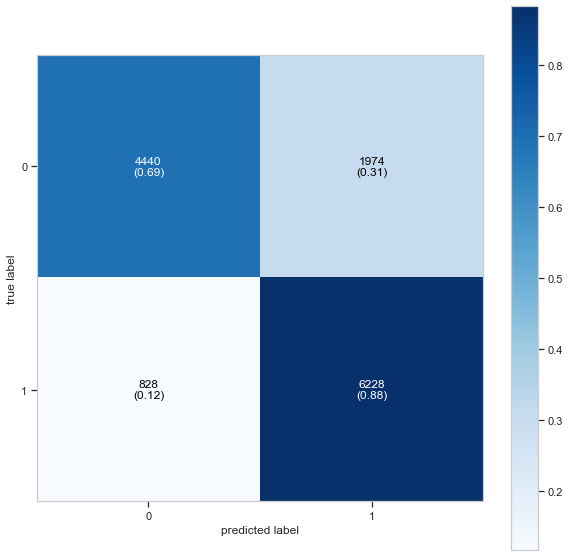

In [93]:
#confusion Matrix:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [94]:
#Ensemble technique:
svc = LinearSVC(C=1, max_iter=500)
nab  = GaussianNB(var_smoothing=1e-08)
log  = LogisticRegression(C=2, max_iter=100)
raf  = RandomForestClassifier(min_samples_leaf=10, min_samples_split=20,random_state=100)

In [107]:
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier(estimators= [('SVM',svc)], voting = 'hard' )
Ens= Ens.fit(X_train , y_train)
Ens

VotingClassifier(estimators=[('SVM', LinearSVC(C=1, max_iter=500))])

In [108]:
y_pred1 = Ens.predict(X_test)
en=Ens.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(Ens.score(X_test, y_test)))

Accuracy score= 0.80


In [109]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.71      0.77      6414
        true       0.77      0.88      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.81      0.79      0.80     13470
weighted avg       0.81      0.80      0.80     13470







confusion matrix


[[4525 1889]
 [ 818 6238]]




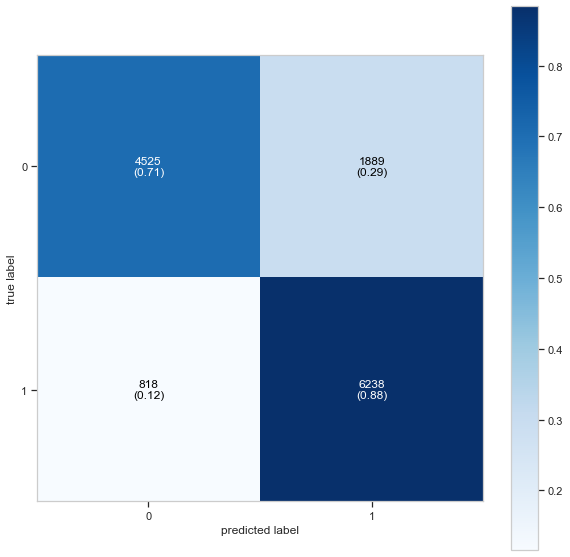

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [113]:
#Comparing all the results of the algorithm:

from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("comparing all the algorithm results :")
x.field_names = ["Alogrithms", "Result"]


x.add_row(["SVM Algorithm:", round(dm,2)])
x.add_row(["Naive Bayes Algorithm:", round(nb,2)])
x.add_row(["LogisticRegression Algorithm:", round(lr,2)])
x.add_row(["Random Forest Algorithm:", round(rf,2)])
x.add_row(["Ensemble Modelling:", round(en,2)])

print(x)



comparing all the algorithm results :
+-------------------------------+--------+
|           Alogrithms          | Result |
+-------------------------------+--------+
|         SVM Algorithm:        |  0.8   |
|     Naive Bayes Algorithm:    |  0.73  |
| LogisticRegression Algorithm: |  0.8   |
|    Random Forest Algorithm:   |  0.79  |
|      Ensemble Modelling:      |  0.8   |
+-------------------------------+--------+
